# Summarize Tool Differences

In the following notebook, we summarize the differences we calculated in `0.get-cytominer-tool-differences`.
We summarize the results in a series of visualizations and descriptive statistics.

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import os
import pathlib
import numpy as np
import pandas as pd
import plotnine as gg

from util import generate_output_filenames

<IPython.core.display.Javascript object>

In [3]:
# Set constants
input_dir = "results"
levels = ["level_3", "level_4a", "level_4b"]
metrics = ["mean", "median", "sum"]

# Set output directory
output_fig_dir = "figures"
os.makedirs(output_fig_dir, exist_ok=True)

# Set plotting defaults
dpi = 500
height = 3.5
width = 6

# Set common plotnine theme
theme_summary = gg.theme_bw() + gg.theme(
    axis_text_x=gg.element_blank(),
    axis_text_y=gg.element_text(size=6),
    axis_title=gg.element_text(size=8),
    strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
)

<IPython.core.display.Javascript object>

In [4]:
# Load Data
results_files = {}
for level in levels:
    file_names = generate_output_filenames(input_dir, level=level)
    metric_df = {}
    for metric in file_names:
        df = pd.read_csv(file_names[metric], sep="\t", index_col=0)
        metric_df[metric] = df

    results_files[level] = metric_df

summary_file = pathlib.Path(f"{input_dir}/comparison_result_metric_summary.tsv")
summary_df = (
    pd.read_csv(summary_file, sep="\t", index_col=0)
    .sort_index()
    .reset_index()
    .rename({"index": "plate"}, axis="columns")
)

print(summary_df.shape)
summary_df.head()

(136, 10)


,plate,level_3_complete_mean_diff,level_3_complete_median_diff,level_3_complete_sum_diff,level_4a_complete_mean_diff,level_4a_complete_median_diff,level_4a_complete_sum_diff,level_4b_complete_mean_diff,level_4b_complete_median_diff,level_4b_complete_sum_diff
0,SQ00014812,0.001559,0.000486,1067.43526,1.252003e+00,0.568772,8.043270e+05,0.950735,0.557862,127048.65997
1,SQ00014813,0.001514,0.000482,1036.84789,1.517534e+00,0.531208,9.737469e+05,0.935201,0.546244,125691.06167
2,SQ00014814,0.001275,0.000498,872.86366,1.961655e+13,0.871164,1.260230e+19,1.065210,0.667649,148072.70163
3,SQ00014815,0.001422,0.000488,973.76201,1.643151e+12,1.024020,1.053720e+18,1.211077,0.752867,163233.77247
4,SQ00014816,0.001737,0.000500,1188.99632,2.507183e+00,0.521139,1.604918e+06,0.717469,0.489839,90917.71217


<IPython.core.display.Javascript object>

In [5]:
# Ensure the plates are in order in each plot
plate_order = summary_df.plate.tolist()
summary_df.plate = pd.Categorical(
    summary_df.plate, categories=plate_order, ordered=True
)

<IPython.core.display.Javascript object>

In [6]:
# Process summary dataframe
summary_melted_df = []
for level in levels:
    for metric in metrics:
        col_name = f"{level}_complete_{metric}_diff"
        subset_df = (
            summary_df.loc[:, ["plate", col_name]]
            .assign(metric=metric, level=level)
            .rename({col_name: "metric_value"}, axis="columns")
        )
        summary_melted_df.append(subset_df)

summary_melted_df = pd.concat(summary_melted_df).reset_index(drop=True)

print(summary_melted_df.shape)
summary_melted_df.head()

(1224, 4)


,plate,metric_value,metric,level
0,SQ00014812,0.001559,mean,level_3
1,SQ00014813,0.001514,mean,level_3
2,SQ00014814,0.001275,mean,level_3
3,SQ00014815,0.001422,mean,level_3
4,SQ00014816,0.001737,mean,level_3


<IPython.core.display.Javascript object>

/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/summary_metrics_full.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


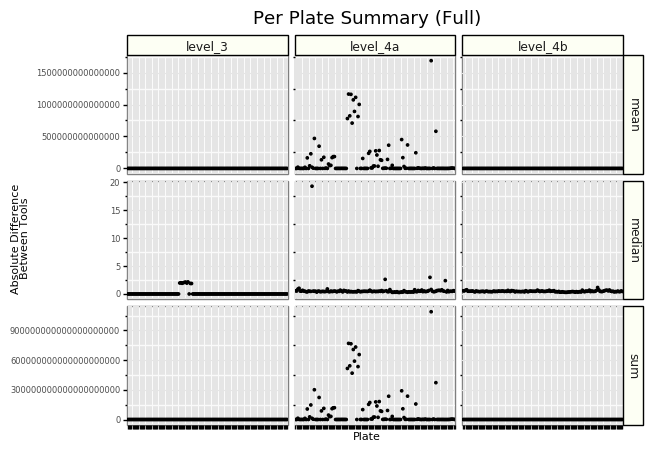

<ggplot: (305517093)>

<IPython.core.display.Javascript object>

In [7]:
summary_metric_full_gg = (
    gg.ggplot(summary_melted_df, gg.aes(x="plate", y="metric_value"))
    + gg.geom_point(size=0.5)
    + gg.facet_grid("metric~level", scales="free")
    + gg.xlab("Plate")
    + gg.ylab("Absolute Difference\nBetween Tools")
    + gg.ggtitle("Per Plate Summary (Full)")
    + theme_summary
)

output_file = pathlib.Path(f"{output_fig_dir}/summary_metrics_full.png")
summary_metric_full_gg.save(output_file, dpi=500, height=4, width=6)

summary_metric_full_gg

/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/summary_metrics_zoom.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


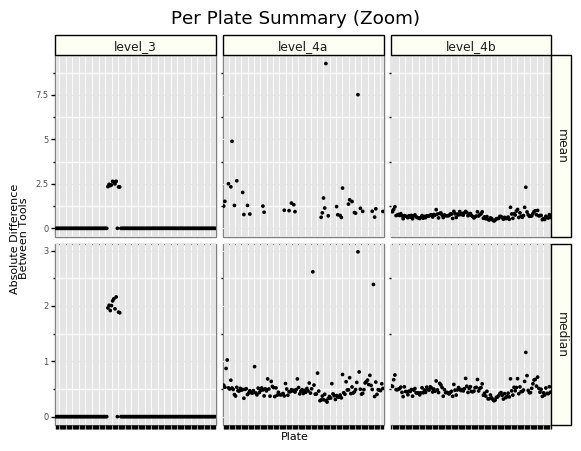

<ggplot: (325183101)>

<IPython.core.display.Javascript object>

In [8]:
summary_metric_zoom_gg = (
    gg.ggplot(
        summary_melted_df.query("metric_value < 10"),
        gg.aes(x="plate", y="metric_value"),
    )
    + gg.geom_point(size=0.5)
    + gg.facet_grid("metric~level", scales="free")
    + gg.xlab("Plate")
    + gg.ylab("Absolute Difference\nBetween Tools")
    + gg.ggtitle("Per Plate Summary (Zoom)")
    + theme_summary
)

output_file = pathlib.Path(f"{output_fig_dir}/summary_metrics_zoom.png")
summary_metric_zoom_gg.save(output_file, dpi=500, height=3.5, width=6)

summary_metric_zoom_gg

In [9]:
# Wrangle output metric data to be plot ready
all_feature_results_df = []
for level in levels:
    for metric in metrics:
        plot_ready_df = (
            results_files[level][metric]
            .reset_index()
            .rename({"index": "feature"}, axis="columns")
            .melt(id_vars="feature", var_name="plate", value_name="metric_value")
            .assign(metric=metric, level=level)
        )
        all_feature_results_df.append(plot_ready_df)

all_feature_results_df = pd.concat(all_feature_results_df).reset_index(drop=True)

# Predetermine feature order
feature_order = sorted(list(set(all_feature_results_df.feature)))

all_feature_results_df.plate = pd.Categorical(
    all_feature_results_df.plate, categories=plate_order, ordered=True
)
all_feature_results_df.feature = pd.Categorical(
    all_feature_results_df.feature, categories=feature_order, ordered=True
)

print(all_feature_results_df.shape)
all_feature_results_df.head()

(1688712, 5)


,feature,plate,metric_value,metric,level
0,Cells_AreaShape_Area,SQ00015171,0.069010,mean,level_3
1,Cells_AreaShape_Center_X,SQ00015171,0.000000,mean,level_3
2,Cells_AreaShape_Center_Y,SQ00015171,0.000000,mean,level_3
3,Cells_AreaShape_Compactness,SQ00015171,0.000065,mean,level_3
4,Cells_AreaShape_Eccentricity,SQ00015171,0.000041,mean,level_3


<IPython.core.display.Javascript object>

## All Feature and Plate Summary

In [10]:
all_feature_results_df.groupby(["metric", "level"])["metric_value"].describe()

count        mean          std       min           25%  \
metric level                                                                 
mean   level_3   242128.0    0.179917     8.425528  0.000000  2.604167e-08   
       level_4a  235663.0         inf          NaN  0.000087  3.291033e-01   
       level_4b   44457.0    0.734179     0.669122  0.000484  3.263937e-01   
median level_3   242128.0    0.144775     7.282180  0.000000  0.000000e+00   
       level_4a  235663.0         inf          NaN  0.000000  2.269100e-01   
       level_4b   44457.0    0.482326     0.364905  0.000445  2.368600e-01   
sum    level_3   242128.0   69.088300  3235.402657  0.000000  1.000000e-05   
       level_4a  242128.0         inf          NaN  0.000000  1.192690e+02   
       level_4b   44457.0  281.906665   256.782686  0.185680  1.253352e+02   

                        50%         75%           max  
metric level                                           
mean   level_3     0.000008    0.000032  9.915254e+02  
       level_4a    0.595551    1.119551           inf  
       level_4b    0.562198    0.955446  5.392864e+01  
median level_3     0.000000    0.000030  8.787197e+02  
       level_4a    0.393170    0.653917           inf  
       level_4b    0.398495    0.631455  1.827510e+01  
sum    level_3     0.003030    0.012120  3.807457e+05  
       level_4a  221.793190  421.264315           inf  
       level_4b  215.883990  366.885480  2.065467e+04

<IPython.core.display.Javascript object>

## Generate Three Figures Per Data Level

/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_3/level_3_metrics_per_plate.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


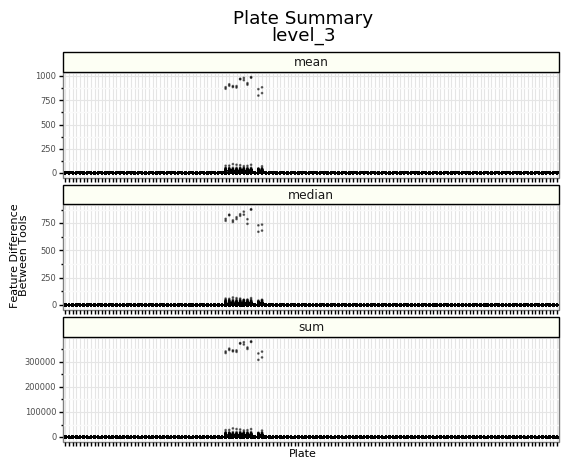

<ggplot: (325592145)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_3/level_3_metrics_per_feature.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


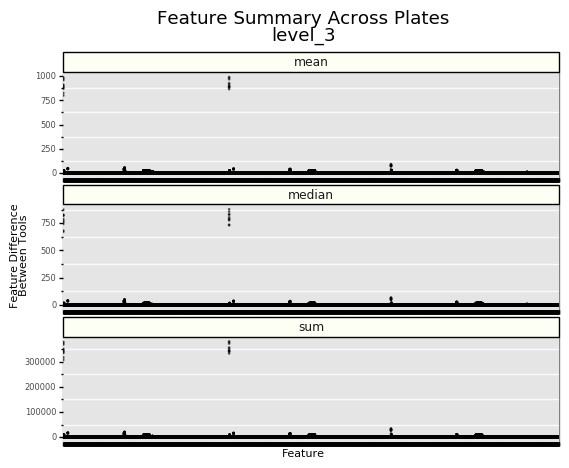

<ggplot: (321038669)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_3/level_3_all_across_well_summary.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 1080 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 1080 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


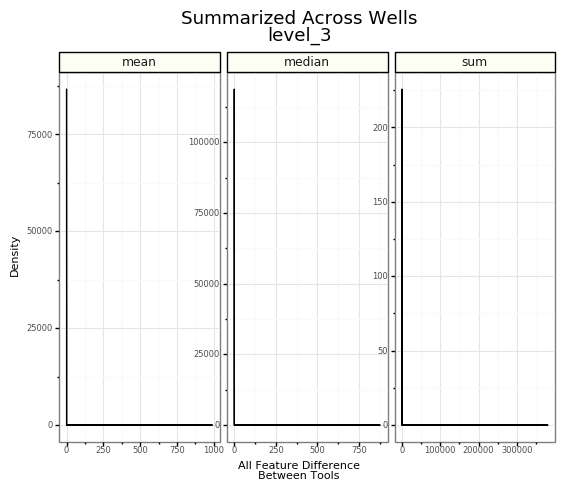

<ggplot: (330490349)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_4a/level_4a_metrics_per_plate.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 14010 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 14010 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


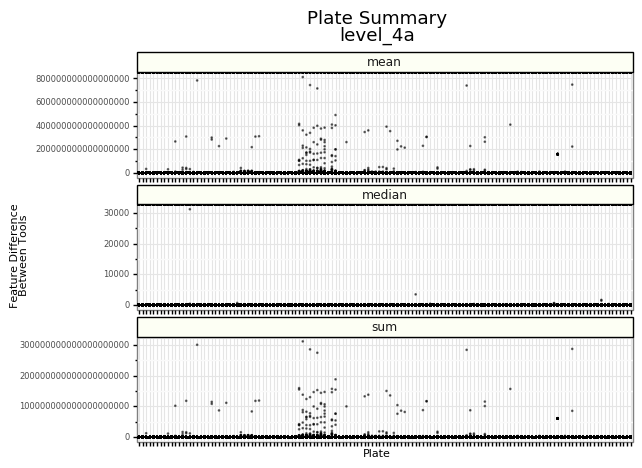

<ggplot: (321029089)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_4a/level_4a_metrics_per_feature.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 14010 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 14010 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


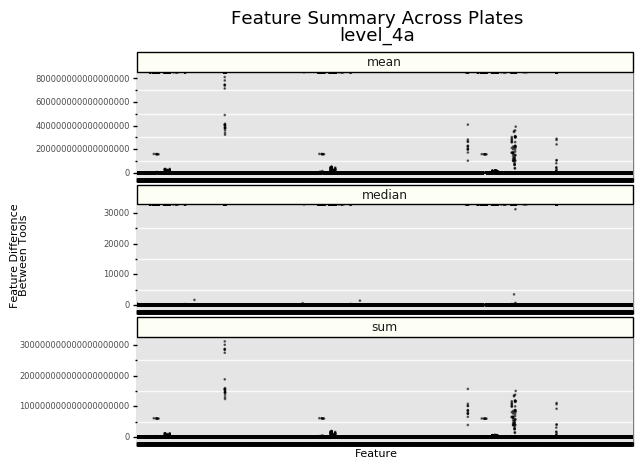

<ggplot: (329141089)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_4a/level_4a_all_across_well_summary.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 37245 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 37245 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


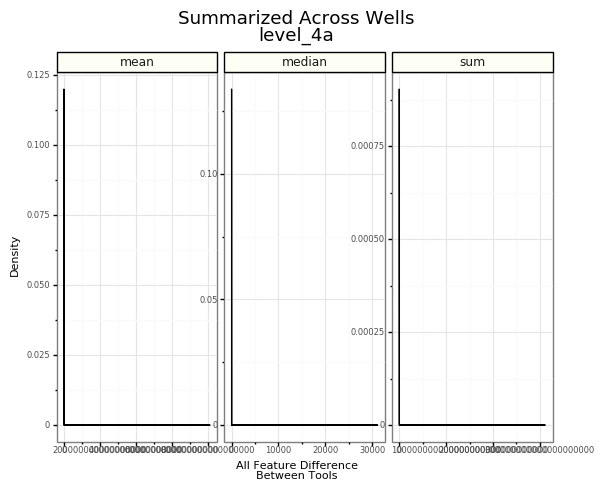

<ggplot: (337082205)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_4b/level_4b_metrics_per_plate.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 100413 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 100413 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


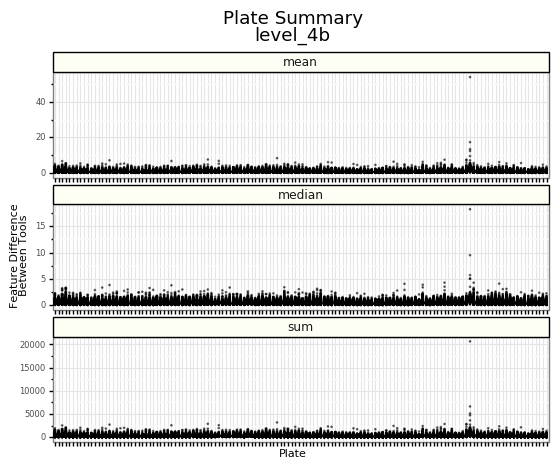

<ggplot: (331898773)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_4b/level_4b_metrics_per_feature.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 100413 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 100413 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


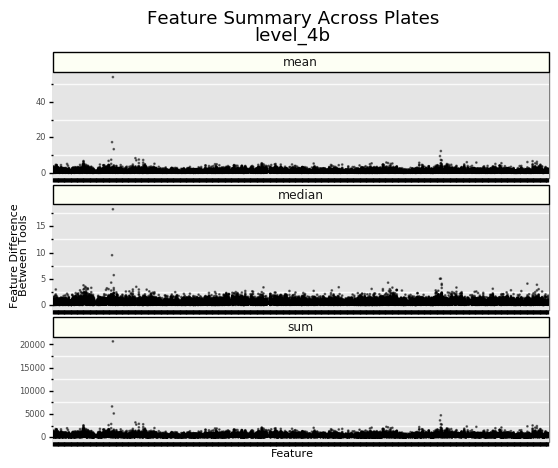

<ggplot: (338165985)>


/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 3.5 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/level_4b/level_4b_all_across_well_summary.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 100413 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 100413 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


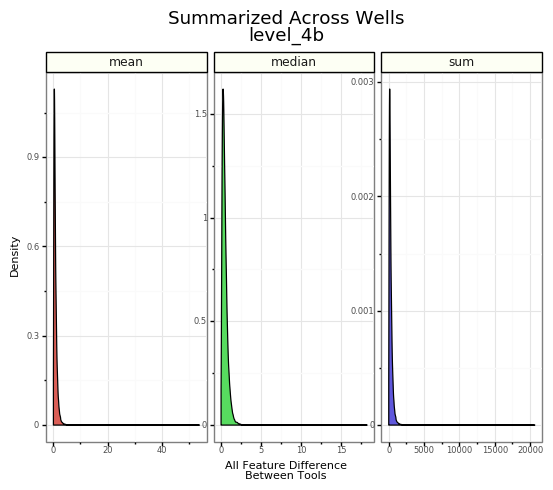

<ggplot: (305749965)>


<IPython.core.display.Javascript object>

In [11]:
for level in levels:
    all_feature_results_subset_df = all_feature_results_df.query(
        "level == @level"
    ).reset_index(drop=True)

    output_dir = pathlib.Path(f"{output_fig_dir}/{level}")
    output_dir.mkdir(exist_ok=True)

    # Figure 1 - Per plate feature differences
    per_plate_feature_gg = (
        gg.ggplot(all_feature_results_subset_df, gg.aes(x="plate", y="metric_value"))
        + gg.geom_point(size=0.1, alpha=0.5)
        + gg.facet_wrap("~metric", scales="free", nrow=len(metrics))
        + gg.xlab("Plate")
        + gg.ylab("Feature Difference\nBetween Tools")
        + gg.ggtitle(f"Plate Summary\n{level}")
        + theme_summary
    )

    output_file = pathlib.Path(f"{output_dir}/{level}_metrics_per_plate.png")
    per_plate_feature_gg.save(output_file, dpi=dpi, height=height, width=width)

    print(per_plate_feature_gg)

    # Figure 2 - Per feature plate differences
    per_feature_gg = (
        gg.ggplot(all_feature_results_subset_df, gg.aes(x="feature", y="metric_value"))
        + gg.geom_point(size=0.1, alpha=0.5)
        + gg.facet_wrap("~metric", scales="free", nrow=len(metrics))
        + gg.xlab("Feature")
        + gg.ylab("Feature Difference\nBetween Tools")
        + gg.ggtitle(f"Feature Summary Across Plates\n{level}")
        + theme_summary
    )

    output_file = pathlib.Path(f"{output_dir}/{level}_metrics_per_feature.png")
    per_feature_gg.save(output_file, dpi=dpi, height=height, width=width)

    print(per_feature_gg)

    # Figure 3 - Density summary of all well level metrics
    feature_summary_density_gg = (
        gg.ggplot(all_feature_results_subset_df, gg.aes(x="metric_value"))
        + gg.geom_density(gg.aes(fill="metric"))
        + gg.facet_wrap("~metric", scales="free", ncol=len(metrics))
        + gg.xlab("All Feature Difference\nBetween Tools")
        + gg.ylab("Density")
        + gg.ggtitle(f"Summarized Across Wells\n{level}")
        + theme_summary
        + gg.theme(
            axis_text=gg.element_text(size=6),
            axis_text_x=gg.element_text(vjust=1),
            legend_position="none",
        )
    )

    output_file = pathlib.Path(f"{output_dir}/{level}_all_across_well_summary.png")
    feature_summary_density_gg.save(output_file, dpi=dpi, height=height, width=width)

    print(feature_summary_density_gg)

## Feature Selection Summary

In [12]:
# Load data
select_file = pathlib.Path(f"{input_dir}/comparison_result_4b_feature_select.tsv.gz")
select_df = (
    pd.read_csv(select_file, sep="\t", index_col=0)
    .reset_index()
    .rename({"index": "feature"}, axis="columns")
    .melt(id_vars="feature", var_name="plate", value_name="status")
)

# Reorder data
select_df.plate = pd.Categorical(select_df.plate, categories=plate_order, ordered=True)
select_df.feature = pd.Categorical(
    select_df.feature, categories=feature_order, ordered=True
)

print(select_df.shape)
select_df.head()

(242488, 3)


,feature,plate,status
0,Nuclei_Texture_Contrast_ER_5_0,SQ00015171,missing
1,Nuclei_Children_Cytoplasm_Count,SQ00015171,missing
2,Cytoplasm_RadialDistribution_RadialCV_ER_1of4,SQ00015171,present_both
3,Cells_Correlation_RWC_DNA_Mito,SQ00015171,only_pycytominer
4,Cytoplasm_Granularity_4_RNA,SQ00015171,only_pycytominer


<IPython.core.display.Javascript object>

/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6 x 4 in image.
  from_inches(height, units), units), PlotnineWarning)
/Users/gway/miniconda3/envs/lincs/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/feature_select_summary.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


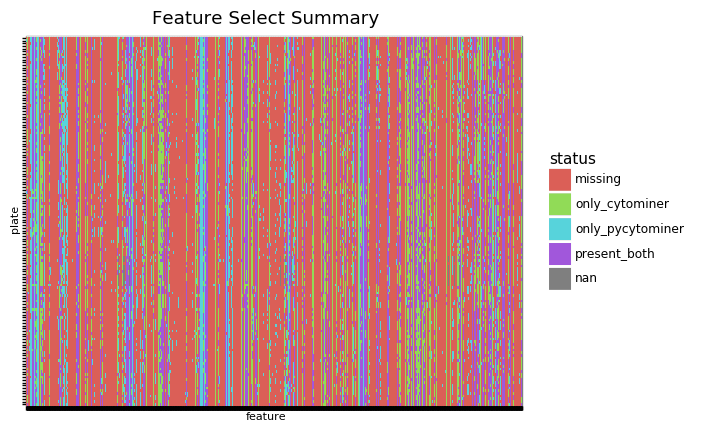

<ggplot: (303079913)>

<IPython.core.display.Javascript object>

In [13]:
feature_select_gg = (
    gg.ggplot(select_df, gg.aes(x="feature", y="plate", fill="status"))
    + gg.geom_tile(size=0.5)
    + gg.ggtitle("Feature Select Summary")
    + theme_summary
    + gg.theme(axis_text_y=gg.element_blank())
)

output_file = pathlib.Path(f"{output_fig_dir}/feature_select_summary.png")
feature_select_gg.save(output_file, dpi=dpi, height=4, width=6)

feature_select_gg